In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from torch.utils import tensorboard

In [2]:
writer = tensorboard.SummaryWriter('runs/mini_project_1')

In [3]:
# Load the data
iris_data = pd.read_csv('IRIS_Flower_Dataset.csv')

In [4]:
# Display basic information about the dataset and summary statistics
iris_data.info()
iris_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


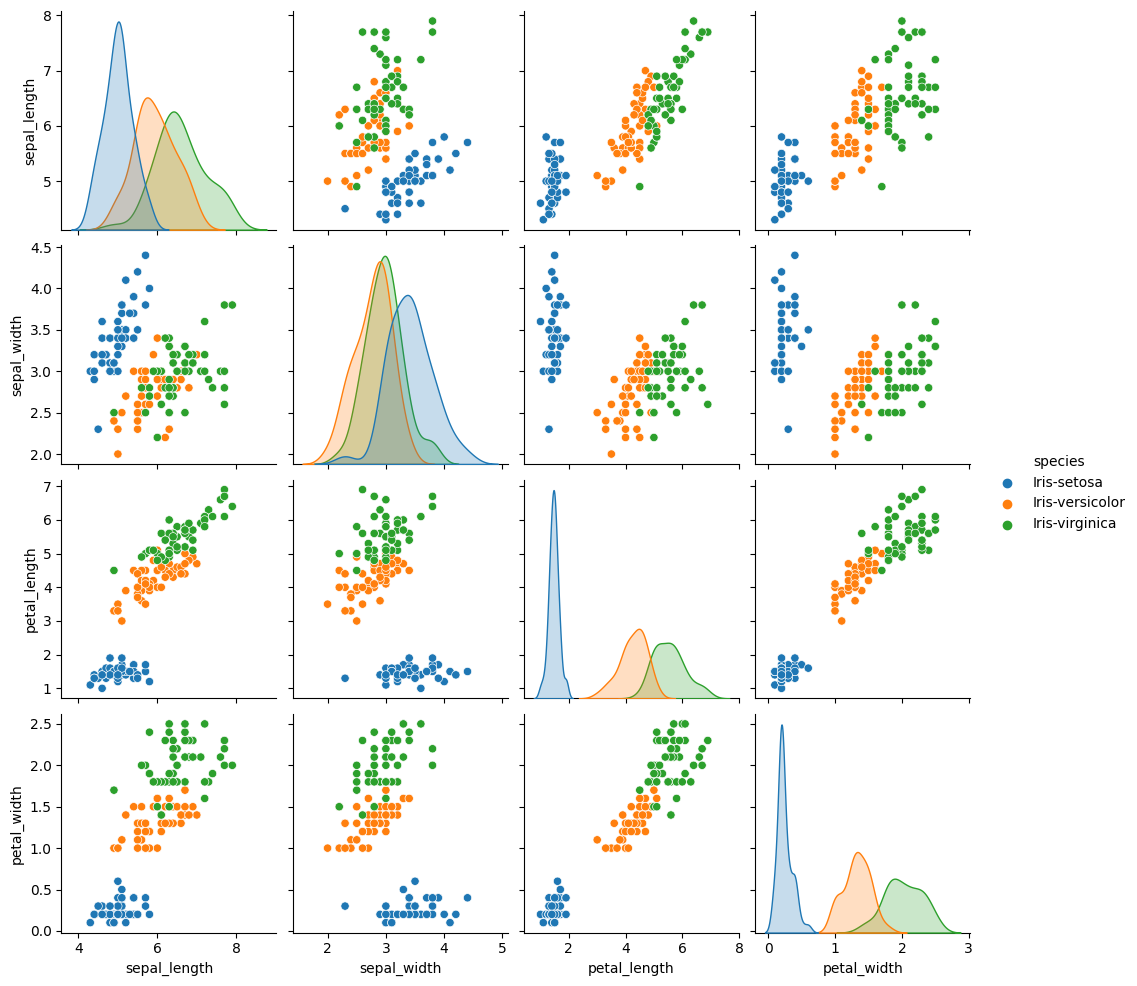

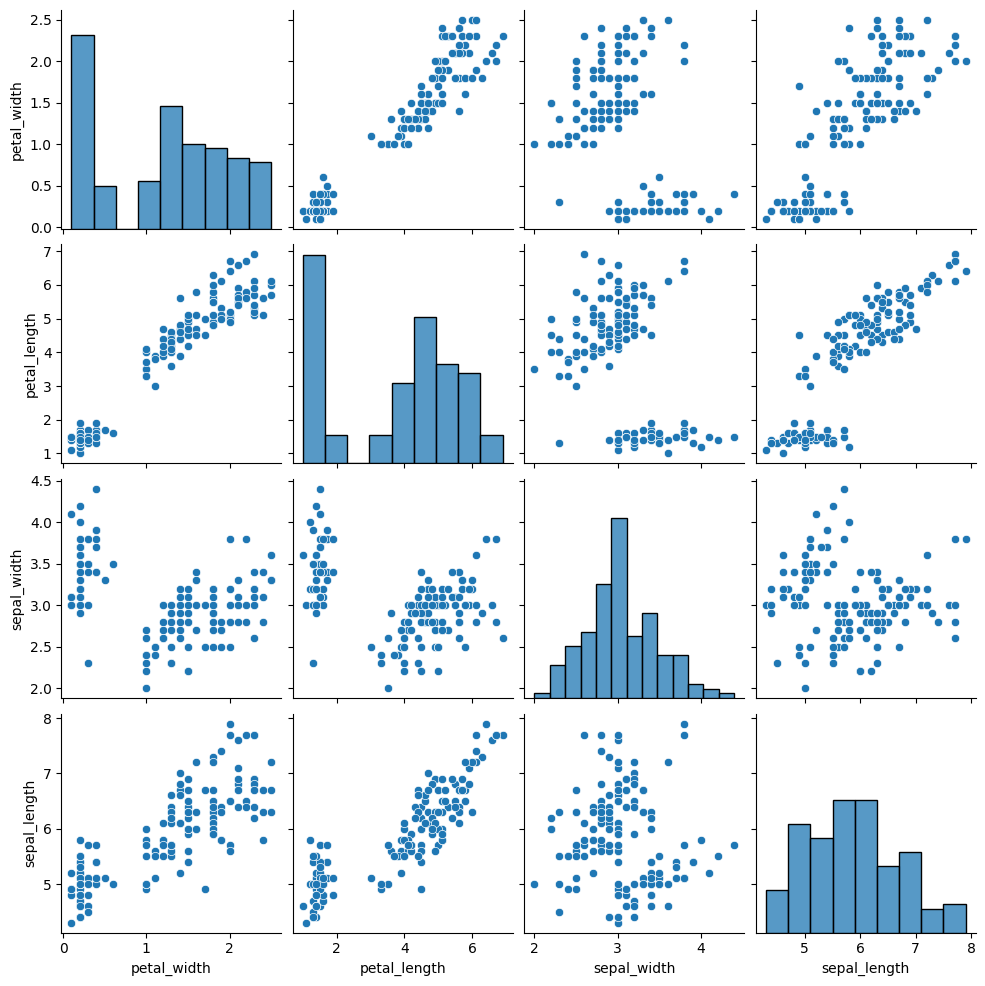

In [5]:
# Visualize the data
sns.pairplot(iris_data, hue="species")
sns.pairplot(iris_data[['petal_width', 'petal_length', 'sepal_width', 'sepal_length']])
plt.show()

In [6]:
# Separate data into features and labels
y = iris_data['species']  # Labels
X = iris_data.drop('species', axis=1)  # Features

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [8]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Predict on the test set
predictions = svm_model.predict(X_test)

In [10]:
# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [11]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [12]:
# Save the SVM model
writer = tensorboard.SummaryWriter('models')
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
print(svm_model)

SVC(kernel='linear')


In [13]:
# Add mapping for each class to a specific color
color_mapping = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

In [14]:
# Replace class labels with corresponding colors
colors = y.map(color_mapping)

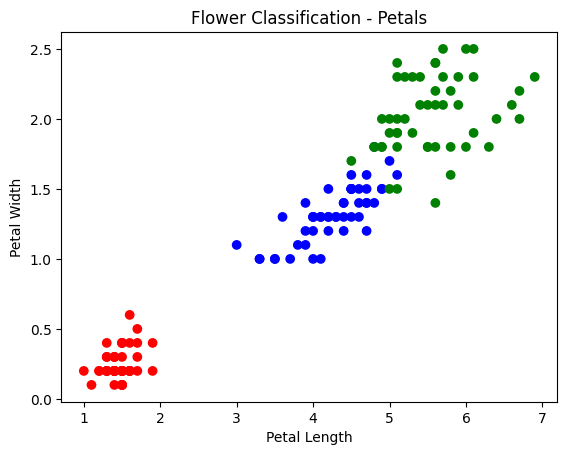

In [15]:
# Scatter plot with colors based on classes for petals
plt.scatter(X['petal_length'], X['petal_width'], c=colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Flower Classification - Petals')
plt.show()

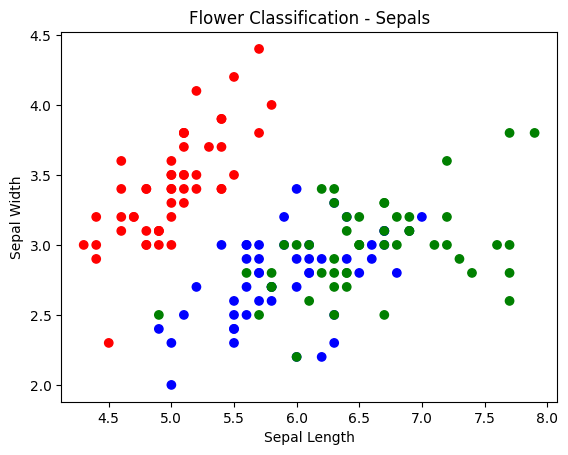

In [16]:
# Scatter plot with colors based on classes for sepals
plt.scatter(X['sepal_length'], X['sepal_width'], c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Flower Classification - Sepals')
plt.show()

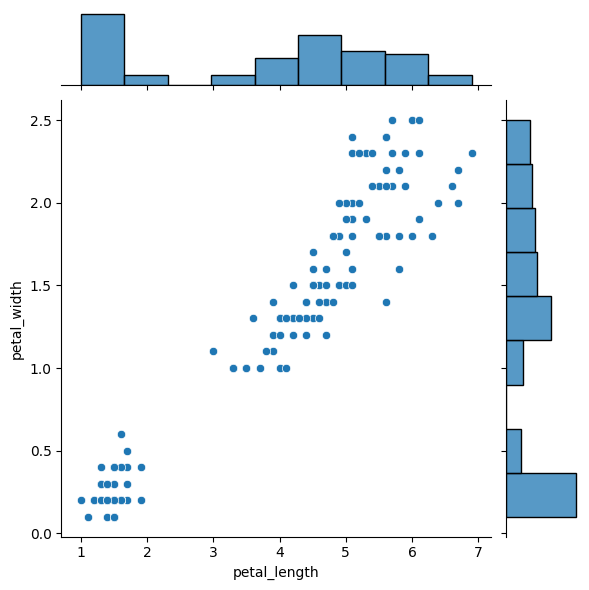

In [17]:
# Jointplots for petals
sns.jointplot(x=iris_data.petal_length, y=iris_data.petal_width)
plt.show()

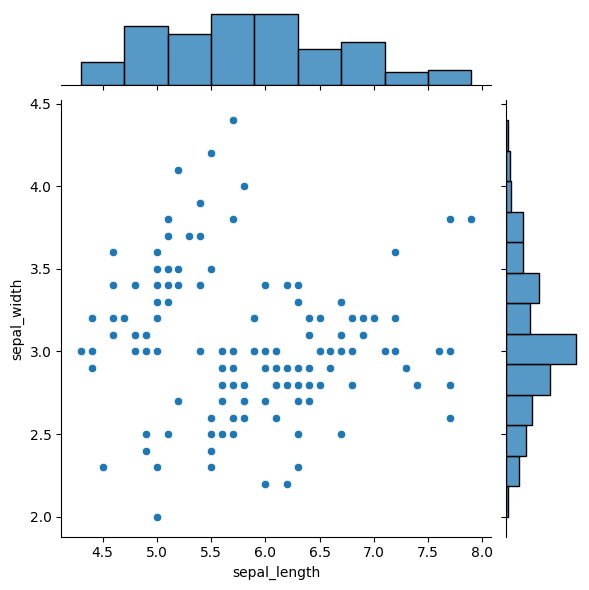

In [18]:
# Jointplots for sepals
sns.jointplot(x=iris_data.sepal_length, y=iris_data.sepal_width)
plt.show()